In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')
evaluaciones = pd.read_csv('../data/Evaluaciones_Agropecuarias_Municipales_EVA.csv')
evaluaciones

,CÓD. \r\nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \r\nDE CULTIVO,SUBGRUPO \r\nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\r\n(ha),Área Cosechada\r\n(ha),Producción\r\n(t),Rendimiento\r\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \r\nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [38]:
# Se muestran los tipos de datos de cada columna del conjunto de datos
evaluaciones.dtypes

CÓD. \r\nDEP.                int64
NOMBRE_DEPARTAMENTO         object
CODIGO_MUNICIPIO             int64
NOMBRE_MUNICIPIO            object
GRUPO \r\nDE CULTIVO        object
SUBGRUPO \r\nDE CULTIVO     object
NOMBRE_CULTIVO              object
REGION_SISTEMA              object
ANIO                         int64
PERIODO                     object
Área Sembrada\r\n(ha)        int64
Área Cosechada\r\n(ha)       int64
Producción\r\n(t)            int64
Rendimiento\r\n(t/ha)      float64
ESTADO_PRODUCCION           object
NOMBRE \r\nCIENTIFICO       object
CICLO_CULTIVO               object
dtype: object

In [36]:
#Se valida si existen valores nulos en los datos de las evaluaciones agropecuarias
evaluaciones.isna()

,CÓD. \r\nDEP.,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO \r\nDE CULTIVO,SUBGRUPO \r\nDE CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,Área Sembrada\r\n(ha),Área Cosechada\r\n(ha),Producción\r\n(t),Rendimiento\r\n(t/ha),ESTADO_PRODUCCION,NOMBRE \r\nCIENTIFICO,CICLO_CULTIVO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206065,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Muestra estadisticas del dataframe de evaluaciones agruapecarias de Colombia
evaluaciones.describe().T

,count,mean,std,min,25%,50%,75%,max
CODIGO_DEPARTAMENTO,206068.0,40.322563,25.278662,5.00,17.0,41.0,68.00,99.0
CODIGO_MUNICIPIO,206068.0,40747.534066,25256.621906,5001.00,17524.0,41357.0,68001.00,99773.0
ANIO,206068.0,2012.455976,3.479113,2006.00,2009.0,2013.0,2015.00,2018.0
AREA_SIEMBRA_HA,206068.0,291.073825,1153.602556,0.00,10.0,35.0,151.00,47403.0
AREA_COSECHA_HA,206068.0,249.419522,980.375226,0.00,8.0,30.0,130.00,38600.0
PRODUCCION_TONELADAS,206068.0,2790.725595,45114.713321,0.00,32.0,140.0,648.00,4546116.0
RENDIMIENTO_TONELADAS_HA,202635.0,9.238820,14.888659,0.03,1.5,5.0,11.23,246.0


In [3]:
#Se realiza cambio en nombre de columnas para evitar el uso de signos de puntuación y caracteres no disponibles en un teclado en inglés
nuevos_nombres = {
    'CÓD. \nDEP.': 'CODIGO_DEPARTAMENTO',
    'DEPARTAMENTO': 'NOMBRE_DEPARTAMENTO',
    'CÓD. MUN.': 'CODIGO_MUNICIPIO',
    'MUNICIPIO': 'NOMBRE_MUNICIPIO',
    'GRUPO \nDE CULTIVO': 'GRUPO_CULTIVO',
    'SUBGRUPO \nDE CULTIVO': 'SUBGRUPO_CULTIVO',
    'CULTIVO': 'NOMBRE_CULTIVO',
    'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'REGION_SISTEMA',
    'AÑO': 'ANIO',
    'PERIODO': 'PERIODO',
    'Área Sembrada\n(ha)': 'AREA_SIEMBRA_HA',
    'Área Cosechada\n(ha)': 'AREA_COSECHA_HA',
    'Producción\n(t)': 'PRODUCCION_TONELADAS',
    'Rendimiento\n(t/ha)': 'RENDIMIENTO_TONELADAS_HA',
    'ESTADO FISICO PRODUCCION': 'ESTADO_PRODUCCION',
    'NOMBRE \nCIENTIFICO': 'NOMBRE_CIENTIFICO',
    'CICLO DE CULTIVO': 'CICLO_CULTIVO'}
evaluaciones.rename(columns=nuevos_nombres, inplace=True)

In [4]:
evaluaciones

,CÓD. \r\nDEP.,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,GRUPO \r\nDE CULTIVO,SUBGRUPO \r\nDE CULTIVO,NOMBRE_CULTIVO,REGION_SISTEMA,ANIO,PERIODO,Área Sembrada\r\n(ha),Área Cosechada\r\n(ha),Producción\r\n(t),Rendimiento\r\n(t/ha),ESTADO_PRODUCCION,NOMBRE \r\nCIENTIFICO,CICLO_CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [14]:
#Se cargan polígonos de los municipios de Colombia
municipios=gpd.read_file('../data/MunicipiosVeredas19MB.json')

In [15]:
#Se utiliza nunique para ver el nú,erp de municipios en el dataframe
municipios.nunique()

DPTOMPIO      1121
DPTO_CCDGO      33
MPIO_CCDGO     580
MPIO_CNMBR    1036
MPIO_CCNCT    1121
geometry      1121
dtype: int64

In [16]:
#Visualizamos el dataframe en una tabla
municipios

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,05001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,05002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,05004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,05021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,05030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...,...,...,...,...
1116,97889,97,889,YAVARATÉ,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,99,001,PUERTO CARREÑO,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,99,524,LA PRIMAVERA,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,99,624,SANTA ROSALÍA,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


<Axes: >

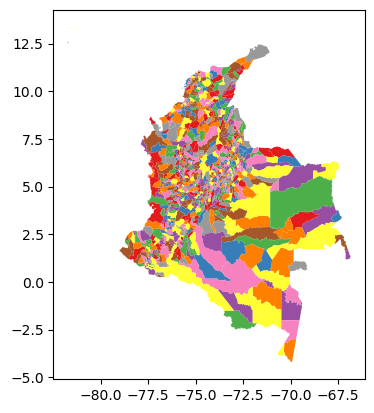

In [18]:
#Graficamos los municipios de colombia durante la exploración de la data
municipios.plot("MPIO_CNMBR", cmap="Set1")  